# Digit Recognition Using SVM

Required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 


### Data Understanding 

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import numpy and panda package 
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [3]:
# read the data set 

Digitizer= pd.read_csv("D:\\Personal\\Studies\\Data Science\\UPGRADE\\Kaggle\\Digit Recognizer\\digit-recognizer\\train.csv")

In [4]:
Digitizer.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Inspect the shape of the dataset
Digitizer.shape

(42000, 785)

In [6]:
# Inspect the different columsn in the dataset

Digitizer.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

There are around 42000 rows and 785 columns present. Each of the column reprasent the pixel value from 0 to 783 (28*28)

In [7]:
# Check the summary of the dataset
Digitizer.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
# check the info() to see the type of the data variable and the null values

Digitizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


All the columns are int and there is no string characteres present in the data set

### Data Cleaning And Preperation

In [9]:
Digitizer.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [10]:
Digitizer.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

There is no missing value present in the data set 

In [11]:
#check the columns which are of type object 
temp=Digitizer.loc[:, Digitizer.dtypes=='object']
temp.columns

Index([], dtype='object')

there is no object variable present in the data set and so no need to create any dummy variables 

In [40]:
#Check the data to compare the image with label value 

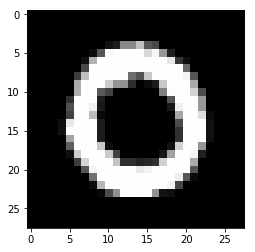

In [39]:
four = Digitizer.iloc[1, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.show()

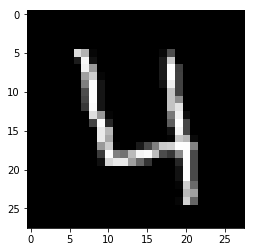

In [13]:
four = Digitizer.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.show()

### EDA

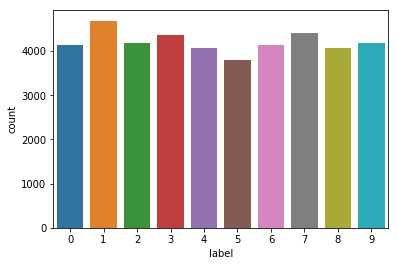

In [14]:
sns.countplot(Digitizer['label'])
plt.show()

sample count for the label 1 is liitle more compared to other labels 

## Test Train Split 

In [15]:
#splitting the data in to x and y
X=Digitizer.drop('label',axis=1)
Y=Digitizer.label.values.astype(int)

In [16]:
#Scaling the features 
#scale function standardises each column
from sklearn.preprocessing import scale
X=scale(X)

In [17]:
# Split the data in to train and test set 
# Import the required library

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, test_size=0.8, random_state=100)

In [18]:
# to confirm that the splitted data also distributed equaly 
print(y_train.mean())
print(y_test.mean())

4.4558333333333335
4.456845238095238


### Model Building  and Model Evaluation

We will build default model for linear and non linear 

In [41]:
# using linear kernel, C=1

model = SVC(C = 1, kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.9106845238095238


In [43]:
# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[3194    0   23    6   10   21   25    2    9    0]
 [   0 3669   21   13    3    5    1    6   26    4]
 [  44   24 3005   85   44   10   32   26   50   12]
 [  20   18   95 3131    4  129    5   19   61   29]
 [  14   10   36    7 2996   12   19   14    7  129]
 [  29   19   27  145   32 2701   51    6   62   17]
 [  55   10   53    4   28   54 3071    0   10    0]
 [  10   28   40   31   66    3    1 3169    5  144]
 [  25   68   57  151   22  111   26   23 2733   25]
 [  23   10   23   33  160    7    0  153   24 2930]]


The linear model accuracy is 91%

In [44]:
# using non linear model ,rbf kernal ,C=1

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.9340773809523809


In [46]:
# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[3199    0   32    2    3   13   28    1   12    0]
 [   0 3654   39   12    5    9    6    4   16    3]
 [  15    8 3190   21   22    2   16   22   29    7]
 [   5   14  123 3187    4   65    8   32   56   17]
 [   3    8   63    0 3029   10   18   13    7   93]
 [  12    7   47   82   17 2841   49    6   17   11]
 [  18    6   67    0   13   32 3140    0    9    0]
 [   1   26  117   11   21    3    1 3192    2  123]
 [  20   36   71   56   16   73   14   12 2918   25]
 [  14   12   64   38   56   10    1  109   24 3035]]


The non linear model accuracy is 93%

## Hyperparameter Tuning 

- C
- gamma

Lets now find the optimal C and gamma parameter for rbf kernal 

In [30]:
# we will use 5 fold crossvalidation 
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1) 

# fit the model
model_cv.fit(X_train, y_train)     

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 23.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [31]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results   

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,105.077270,0.520652,12.662632,0.238562,1,0.01,"{'C': 1, 'gamma': 0.01}",0.769643,0.745833,0.727976,...,0.750833,0.014704,12,0.999851,1.000000,0.999851,1.000000,0.999851,0.999911,0.000073
1,26.011583,0.357980,7.241437,0.230030,1,0.001,"{'C': 1, 'gamma': 0.001}",0.946429,0.930952,0.930357,...,0.933810,0.006643,4,0.974256,0.975298,0.975000,0.974851,0.975149,0.974911,0.000360
2,38.630942,0.947618,9.990224,0.277707,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.911905,0.888095,0.898810,...,0.898571,0.007684,8,0.914286,0.917708,0.912798,0.916369,0.915476,0.915327,0.001689
3,105.644830,4.944317,13.725088,0.756351,10,0.01,"{'C': 10, 'gamma': 0.01}",0.784524,0.763095,0.746429,...,0.767500,0.013696,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,22.843052,0.265937,7.078329,0.312872,10,0.001,"{'C': 10, 'gamma': 0.001}",0.950000,0.943452,0.942857,...,0.942976,0.004524,3,0.999554,0.999702,0.999702,0.999405,0.999702,0.999613,0.000119
5,17.672562,0.269711,6.297706,0.189983,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.942262,0.919048,0.930357,...,0.928333,0.007866,6,0.962946,0.964583,0.963244,0.963393,0.963839,0.963601,0.000569
6,110.256278,2.282902,13.188606,0.711012,100,0.01,"{'C': 100, 'gamma': 0.01}",0.784524,0.763095,0.746429,...,0.767500,0.013696,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,21.031976,0.735160,6.339297,0.119463,100,0.001,"{'C': 100, 'gamma': 0.001}",0.949405,0.942262,0.943452,...,0.943333,0.004797,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,12.592589,0.482944,5.015299,0.169152,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.939881,0.927381,0.926786,...,0.928810,0.005729,5,0.995387,0.996429,0.995982,0.995833,0.995536,0.995833,0.000365
9,102.606202,2.089306,12.079431,0.107308,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.784524,0.763095,0.746429,...,0.767500,0.013696,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfon

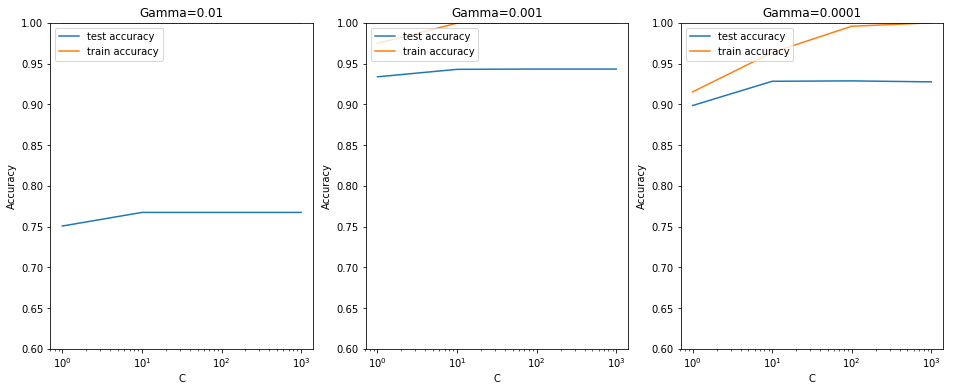

In [32]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()

The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance

In [33]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9433333333333334 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [35]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.9424404761904762 

[[3216    0   24    1    3   13   20    1   12    0]
 [   0 3665   33   11    5    3    5    7   15    4]
 [  14   13 3185   36   16    2   18   17   24    7]
 [   5    5   92 3244    3   52    9   23   58   20]
 [   6    8   48    0 3056    7   12   14    9   84]
 [   9    6   39   73    9 2865   47    5   18   18]
 [  26    3   56    1   12   29 3148    0   10    0]
 [   4   25   89   20   32    2    0 3256    4   65]
 [  16   21   59   62   17   63   13   10 2957   23]
 [  17    6   53   22   67    9    1   99   15 3074]] 



## Conclusion

The accuracy achieved using a non-linear kernel (~0.94) and we can use this model.